# Introduction

Credit card fraud detection is a critical application of machine learning that helps financial institutions identify fraudulent transactions and protect customers from unauthorized activities. In this project, we'll walk through the steps of building a credit card fraud detection model using Python. We'll start by importing the necessary libraries and loading the dataset. Then, we'll perform data preprocessing, exploratory data analysis, model training, and handle class imbalance. Each step will be explained along with the associated code.

I hope that this project will have a positive impact over your learning journey towards the Financial Data Science journey. Contact me anytime over LinkedIn https://www.linkedin.com/in/realelshamy/ for any questions regarding the project. 


# About Dataset


It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Link to stored dataset @Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


## Step 1: Importing Libraries and Loading Dataset:



We begin by importing the required libraries such as Pandas, NumPy, Seaborn, and Matplotlib for data manipulation and visualization. The dataset, stored in a CSV file named 'creditcard.csv', is loaded into a Pandas DataFrame. Let's proceed with loading the dataset and performing initial data checks.



In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Loading dataset
df = pd.read_csv('./creditcard.csv')
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

## Step 2: Data Statistics and Information:



To understand the basic statistics of the dataset, we use the describe() function, which provides information about the mean, standard deviation, minimum, maximum, and quartiles of each numerical feature. Additionally, info() provides information about the data types and the presence of null values in the dataset.



In [3]:
#Statistics
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Step 3: Data Preprocessing:



We check for any null values in the dataset using the isnull().sum() function. In this case, the result is zero, indicating that the dataset does not have any null values.



In [5]:
#Data preprocessing

#Check for null values
df.isnull().sum()
#Resulting in zero means that we have a dataset that does not have any nulls

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Step 4: Exploratory Data Analysis (EDA):



We visualize the distribution of the target variable 'Class' using a countplot. Then, we create distribution plots (dist plots) for each feature, excluding 'Time', 'Amount', and 'Class'.



<AxesSubplot:xlabel='Class', ylabel='count'>

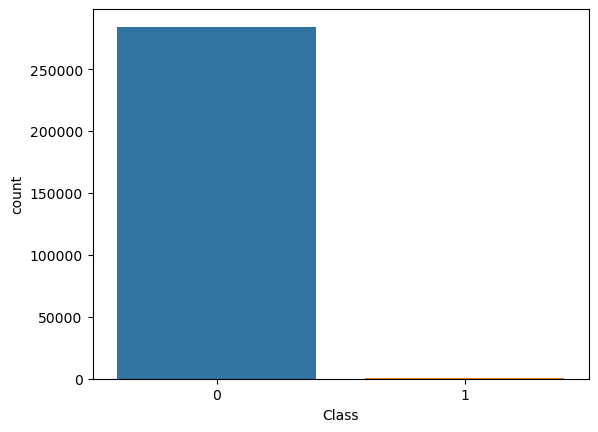

In [6]:
##Exploratory Data Analysis
sns.countplot(df['Class'])

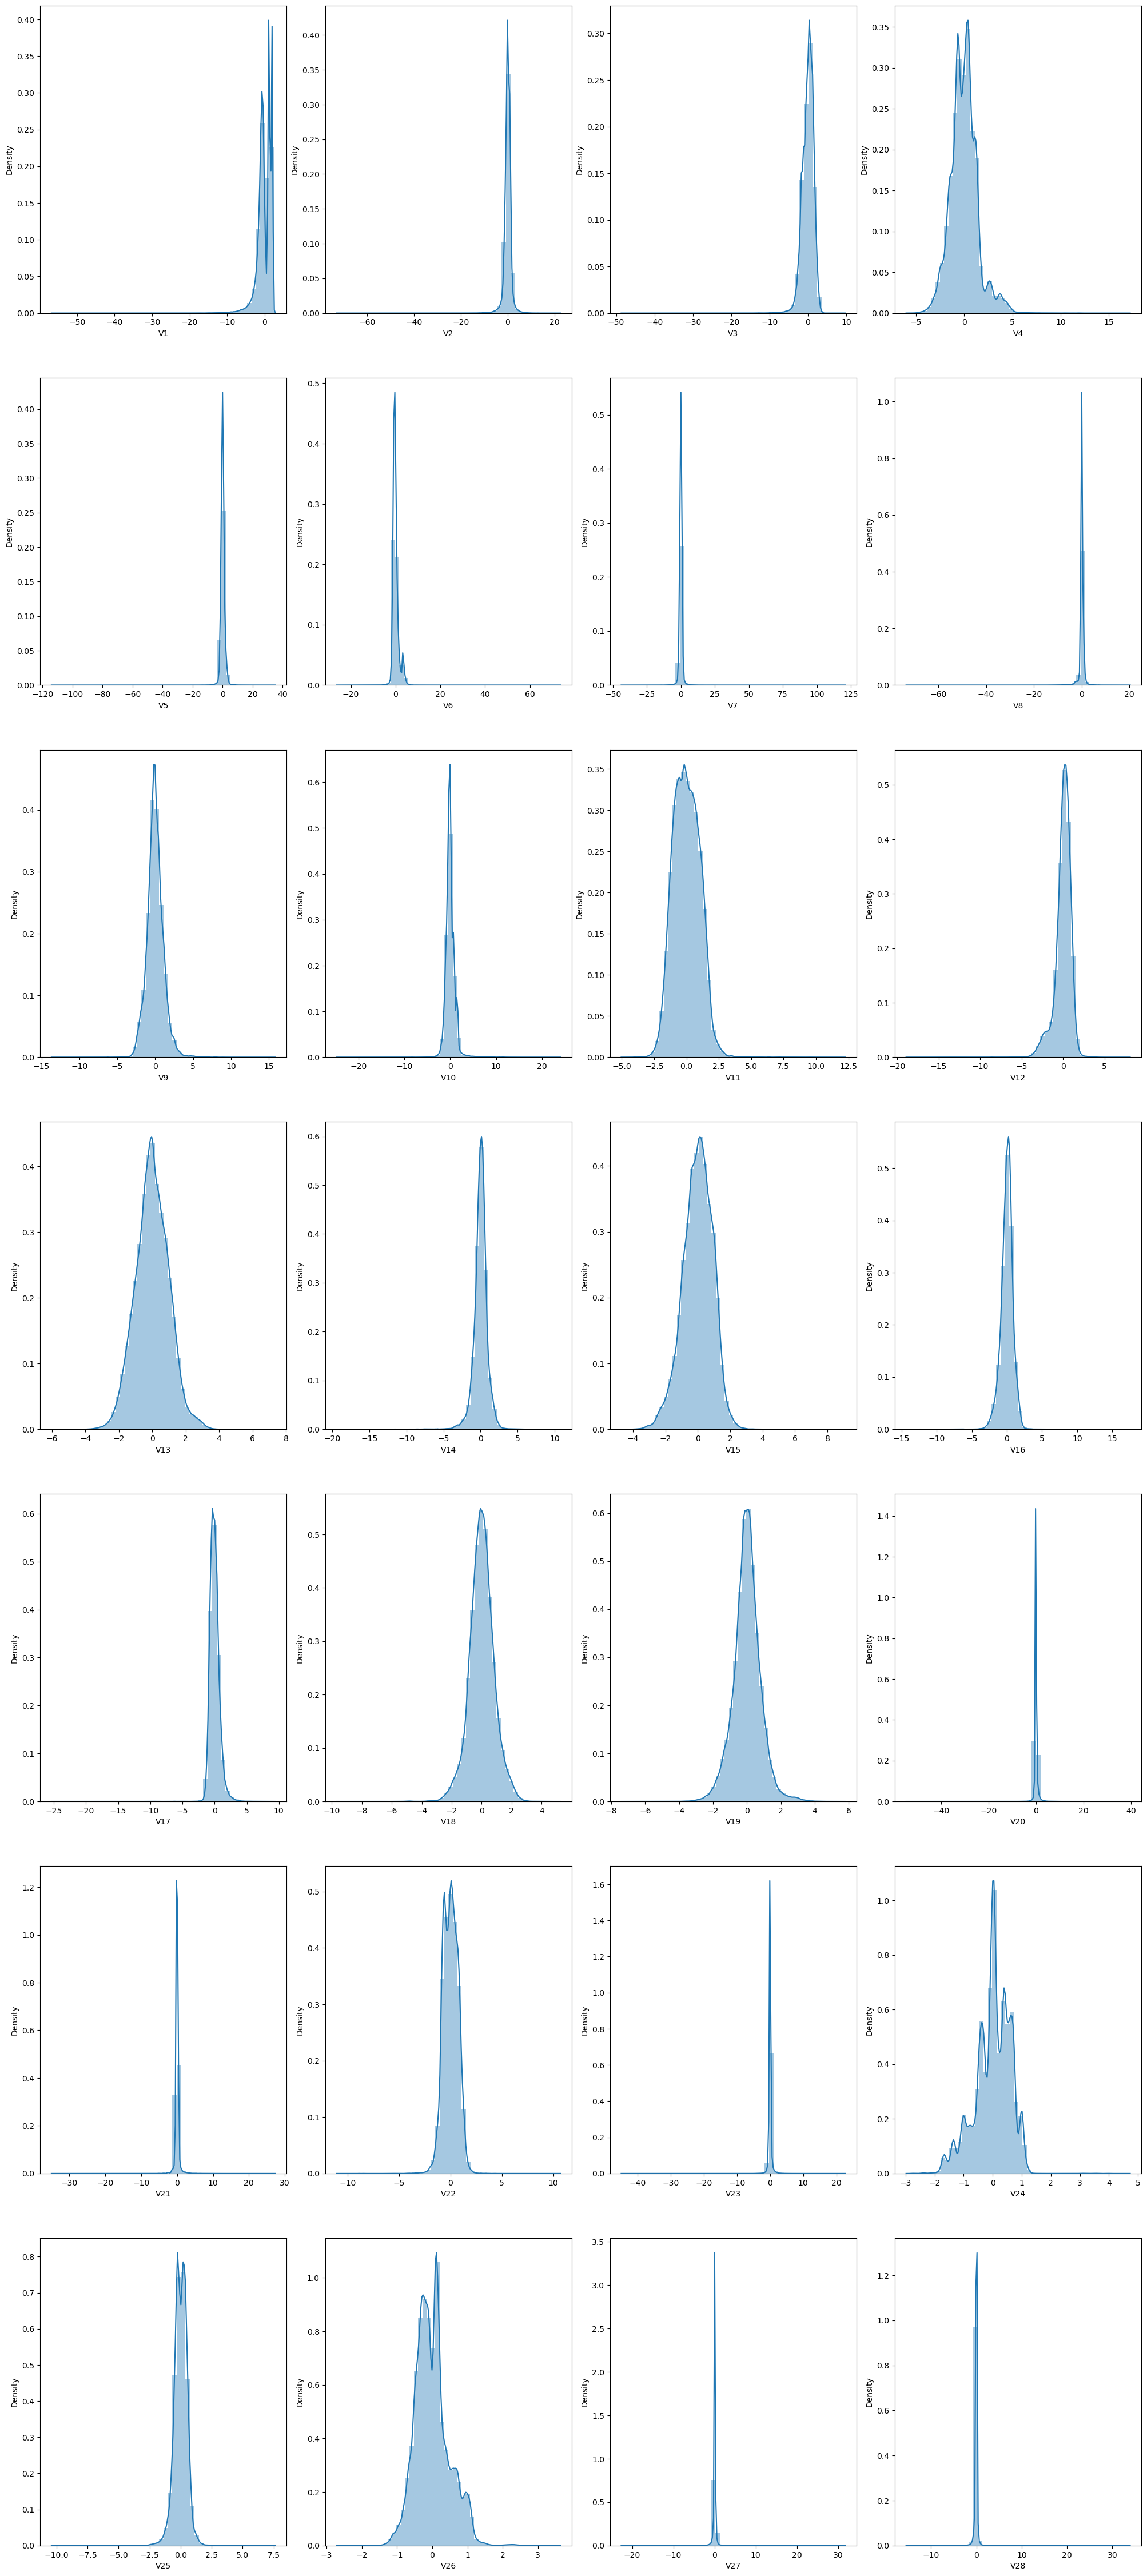

In [7]:
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

#create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20,45))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

We also visualize the distribution of 'Time' and 'Amount' using displot.



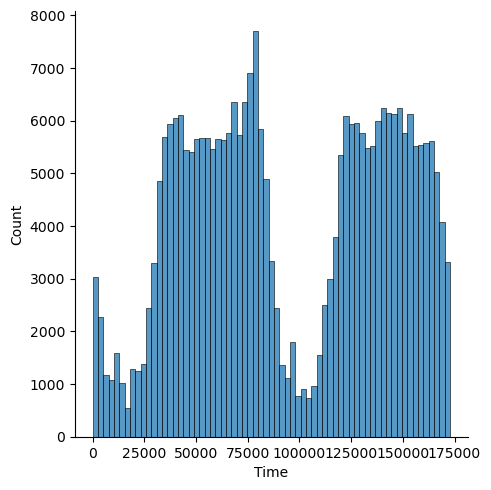

In [8]:
sns.displot(df['Time'])

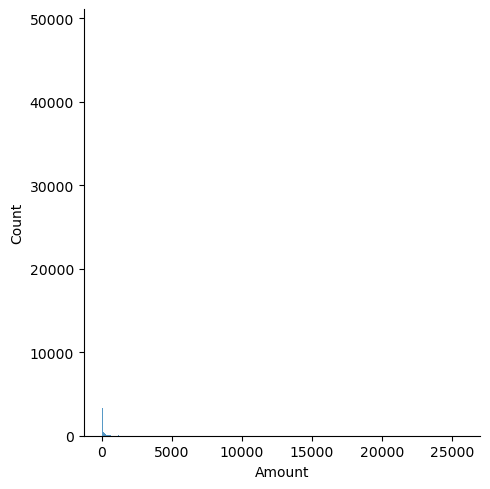

In [9]:
sns.displot(df['Amount'])

## Step 5: Correlation Matrix:



We create a correlation matrix to understand the relationships between features. The heatmap generated using Seaborn's heatmap() function shows the correlation values between pairs of features. This helps identify potential correlations between features, which could impact model performance.



<AxesSubplot:>

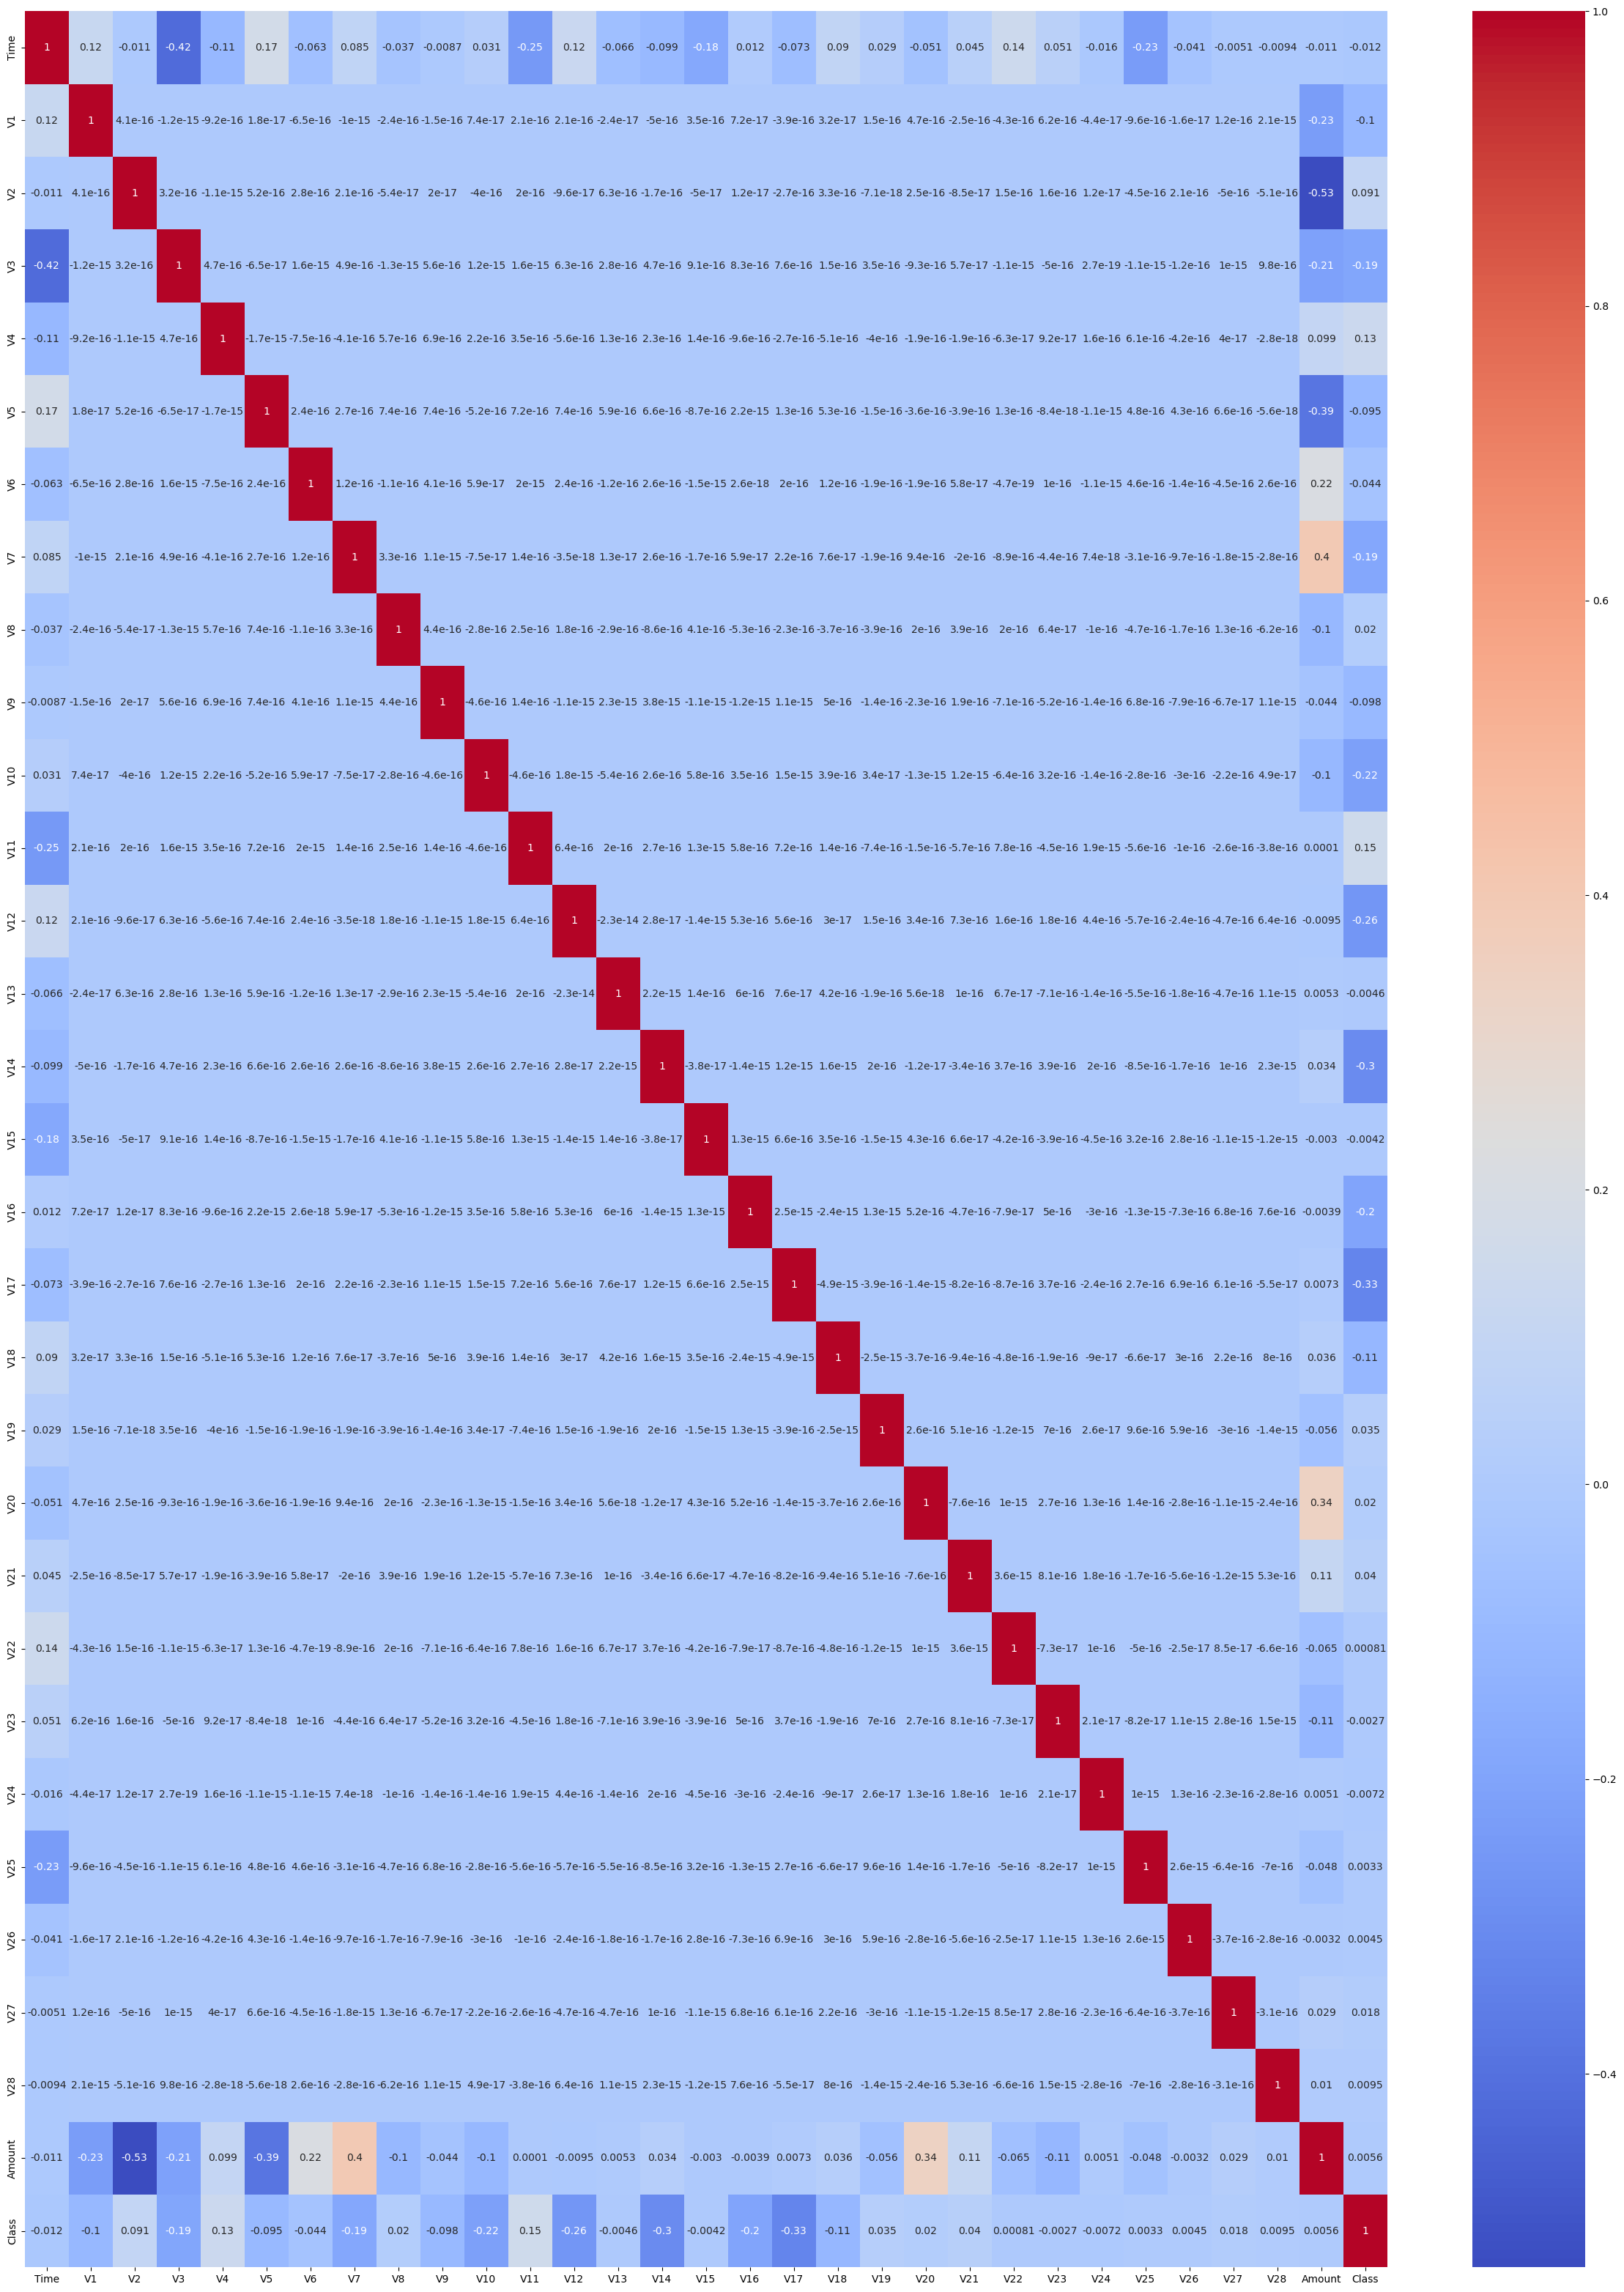

In [10]:
#Coorelation Matrix
corr = df.corr()
plt.figure(figsize=(30,40))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Step 6: Data Preparation for Modeling:



We split the dataset into input features 'x' and the target variable 'y'. Additionally, we perform standard scaling on the input features using the StandardScaler from Scikit-learn to bring all features to a similar scale.



In [11]:
#Input Splot
x=df.drop(columns=['Class'], axis=1)
y=df['Class']

In [12]:
## Standard Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x)

In [13]:
x_scaler[-1]

array([ 1.64205773, -0.27233093, -0.11489898,  0.46386564, -0.35757   ,
       -0.00908946, -0.48760183,  1.27476937, -0.3471764 ,  0.44253246,
       -0.84072963, -1.01934641, -0.0315383 , -0.18898634, -0.08795849,
        0.04515766, -0.34535763, -0.77752147,  0.1997554 , -0.31462479,
        0.49673933,  0.35541083,  0.8861488 ,  0.6033653 ,  0.01452561,
       -0.90863123, -1.69685342, -0.00598394,  0.04134999,  0.51435531])

## Step 7: Model Training:



We split the dataset into training and testing sets using train_test_split(). We then train and test three different classification models: Logistic Regression, Random Forest, and XGBoost.



In [15]:
#train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.25, random_state=42, stratify=y)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#training
model.fit(x_train, y_train)
#testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print ("F1 Score: ",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.85      0.63      0.72       123

    accuracy                           1.00     71202
   macro avg       0.92      0.81      0.86     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.719626168224299


In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#training
model.fit(x_train, y_train)
#testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print ("F1 Score: ",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.98      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.8622222222222222


In [18]:
from xgboost import XGBClassifier
model = XGBClassifier()
#training
model.fit(x_train, y_train)
#testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print ("F1 Score: ",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.94      0.79      0.86       123

    accuracy                           1.00     71202
   macro avg       0.97      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.8584070796460177


## Step 8: Handling Class Imbalance:



Class imbalance is a common issue in fraud detection, where the number of non-fraudulent transactions far exceeds the number of fraudulent transactions. We use the SMOTE technique from the imbalanced-learn library to oversample the minority class (fraudulent transactions) and balance the dataset.



<AxesSubplot:xlabel='Class', ylabel='count'>

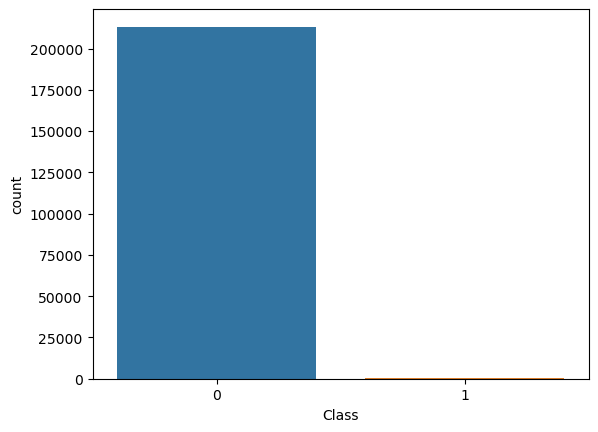

In [20]:
sns.countplot(y_train)

In [21]:
!pip install imbalanced-learn

In [22]:
#use combination of over and undersampling
#balance the class with equal distribution
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(x_train, y_train)

<AxesSubplot:xlabel='Class', ylabel='count'>

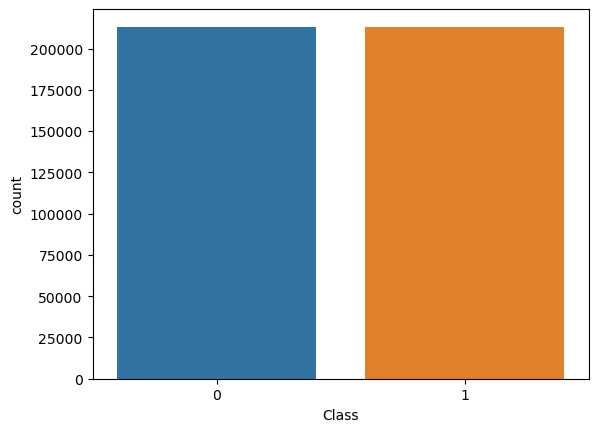

In [23]:
sns.countplot(y_smote)

## Step 9: Retesting the Model with Balanced Data:



We retrain and retest the previously used models (Logistic Regression, Random Forest, XGBoost) using the balanced dataset obtained from the SMOTE technique.



In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#training
model.fit(x_smote, y_smote)
#testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print ("F1 Score: ",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.11       123

    accuracy                           0.98     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.98      0.99     71202

F1 Score:  0.1116231438812084


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#training
model.fit(x_smote, y_smote)
#testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print ("F1 Score: ",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.80      0.84       123

    accuracy                           1.00     71202
   macro avg       0.94      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.8425531914893618


In [27]:
!pip install XGBoost

In [28]:
from xgboost import XGBClassifier
model = XGBClassifier()
#training
model.fit(x_smote, y_smote)
#testing
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print ("F1 Score: ",f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.73      0.85      0.78       123

    accuracy                           1.00     71202
   macro avg       0.87      0.92      0.89     71202
weighted avg       1.00      1.00      1.00     71202

F1 Score:  0.7849056603773586


## Conclusion:



- The transaction amount is relatively small. The mean of all the mounts made is approximately USD 88.
- There are no "Null" values, so we didn't have to work on ways to replace values.
- Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.

In this project, we performed a comprehensive credit card fraud detection analysis. We began by loading the dataset and performing data preprocessing to ensure data quality. 

Exploratory data analysis helped us understand the distribution of features and identify potential correlations. We then trained classification models (Logistic Regression, Random Forest, and XGBoost) on the original imbalanced dataset and observed their performance. 

Recognizing the class imbalance issue, we applied the SMOTE technique to balance the dataset and retested the models. Comparing the results, we observed significant improvements in model performance, as indicated by higher F1 scores and improved classification reports. 

Handling class imbalance is crucial for building effective fraud detection models, ensuring that both fraudulent and non-fraudulent transactions are accurately classified.






I hope that this project will have a positive impact over your learning journey towards the Financial Data Science journey. Contact me anytime over LinkedIn https://www.linkedin.com/in/realelshamy/ for any questions regarding the project. 
